<a href="https://colab.research.google.com/github/blakedshull/datascience/blob/main/Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd

In [156]:
filename = '/content/sales_predictions.csv'

In [157]:
df = pd.read_csv(filename)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [158]:
df.shape

(8523, 12)

In [159]:
df.dtypes 

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [160]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [161]:
df.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [162]:
# No duplicates

In [163]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [164]:
df = df.drop(columns=["Item_Weight"])
df['Outlet_Size'].fillna('Unknown', inplace=True)
df.isna().sum()

# I chose to drop Item_Weight because the unknown values represent 17% of the data.  Dropping the rows would lose us too much valuable sales data.  Inputting any value would skew the data to the point of unreliability.  Even inputting the mean or median throws off median or mean, respectively, as well as our variability and confidence intervals of any analyses we might do.  The column is already not useful unless we wanted to delete the rows, and the rows are more important.  Multivariate or k-NN looked viable but I do not understand them well enough yet.
# I chose to fill in "Unknown" for Outlet_Size because it is already categorical data, so I would not throw off any numbers.  One value is not so overwhelmingly common that I would use the mode as a fill, and deleting the rows loses us over a quarter of our values.  Deleting the column would be my next choice, but there is no harm in simply filling it with "Unknown" and keeping the rest of the data.

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [165]:
df.dtypes 

Item_Identifier               object
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [166]:
df['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [167]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [168]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [169]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [170]:
df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [171]:
df['Outlet_Size'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [172]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [173]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [174]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [175]:
df['Item_MRP'].describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [176]:
df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [177]:
df['Item_Outlet_Sales'].describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Items')

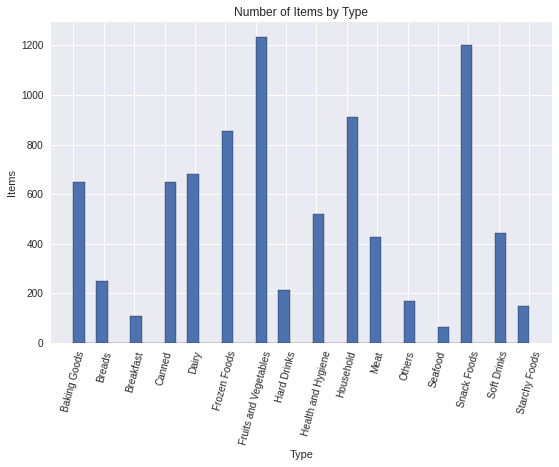

In [179]:
plt.style.use('seaborn')
alphabetized = df.sort_values('Item_Type')
alphabetized = alphabetized.sort_values('Item_Type')
alphabetized['Item_Type'].hist(bins = 40,
                                   edgecolor='black')
plt.xticks(rotation = 75)
plt.title("Number of Items by Type")
plt.xlabel("Type")
plt.ylabel("Items")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

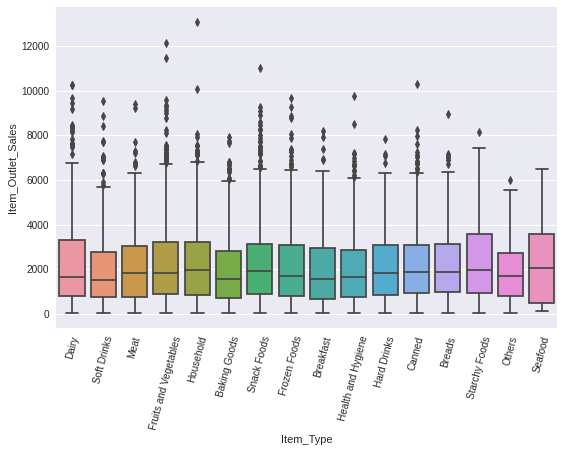

In [180]:
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=df)
plt.xticks(rotation = 75)

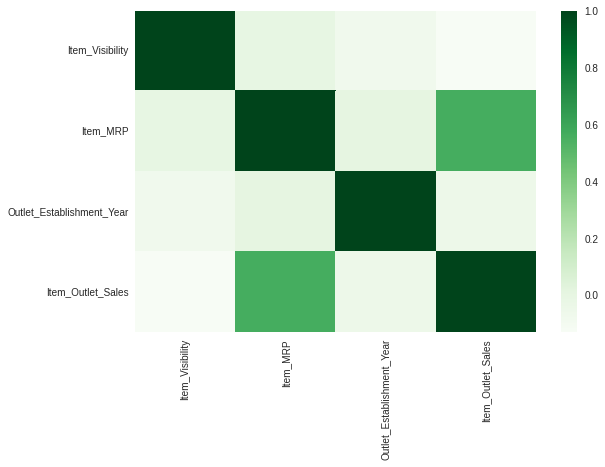

In [181]:
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens')

Text(0, 0.5, 'Sales')

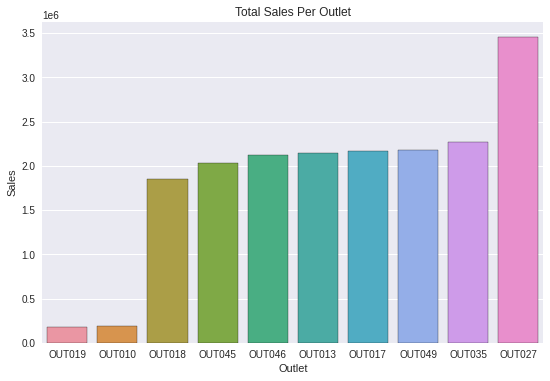

In [182]:
plt.style.use('seaborn')
sales_by_outlet = df.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
sales_by_outlet = sales_by_outlet.sort_values(by = 'Item_Outlet_Sales')
sns.barplot(data = sales_by_outlet, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', edgecolor='black')
plt.title("Total Sales Per Outlet")
plt.xlabel("Outlet")
plt.ylabel("Sales")

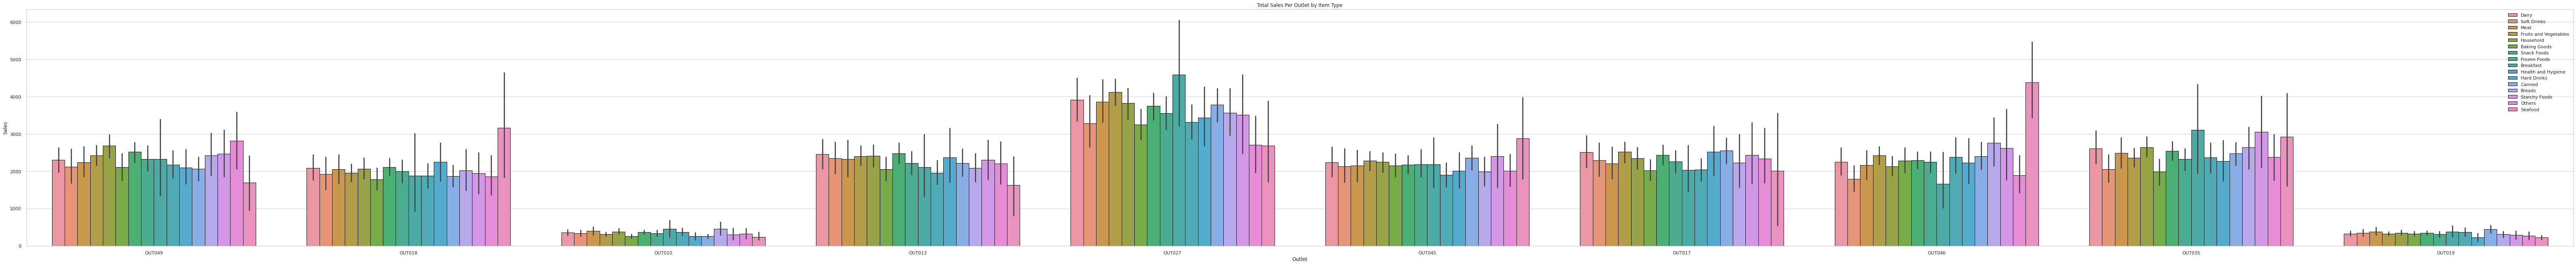

In [183]:
# Zoom and scroll to see, its a big graph!
plt.style.use('seaborn')
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(100,10)) # From https://learningactors.com/how-to-make-better-looking-charts-in-python/
sns.barplot(data = df, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', hue = 'Item_Type', edgecolor='black', )
plt.title("Total Sales Per Outlet by Item Type")
plt.xlabel("Outlet")
plt.ylabel("Sales")
plt.legend(bbox_to_anchor = (1,1))
plt.show()


Text(0, 0.5, 'Sales')

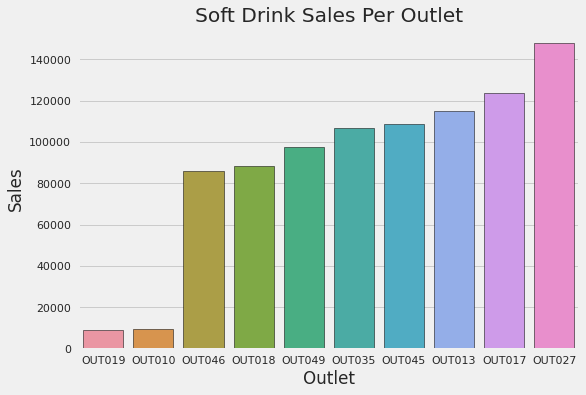

In [288]:
filter = df[df['Item_Type'] == 'Soft Drinks']
plt.style.use('fivethirtyeight')
sales_by_outlet = filter.groupby('Outlet_Identifier')['Item_Outlet_Sales'].sum().reset_index()
sales_by_outlet = sales_by_outlet.sort_values(by = 'Item_Outlet_Sales')
sns.barplot(data = sales_by_outlet, x = 'Outlet_Identifier', y = 'Item_Outlet_Sales', edgecolor='black')
plt.title("Soft Drink Sales Per Outlet")
plt.xlabel("Outlet")
plt.ylabel("Sales")

# If a sugary drink tax were to pass this graph does a good job showing which ones would be most affected aggregate.  But in order to find out the 
# full context, we need to understand soft drink sales as a percent of their total sales.  I'll be analyzing the top outlet against an average sales one and 
# the bottom sales one to see if outlet 27 just sells more items, or if it is proportionally in trouble.

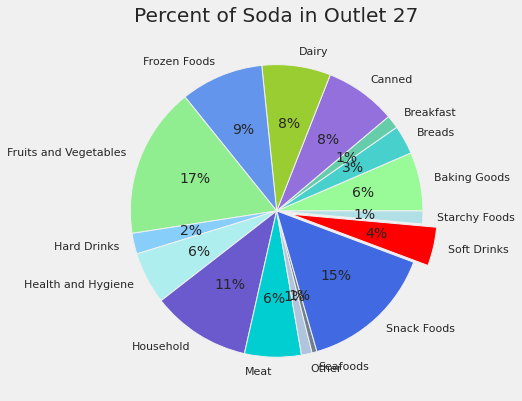

In [283]:
filter2 = df[df['Outlet_Identifier'] == 'OUT027']
soda = filter2.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 27')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.

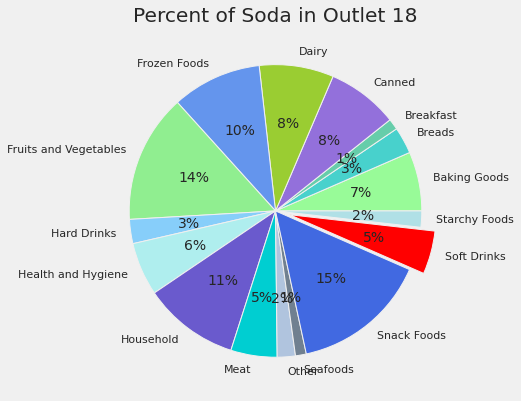

In [284]:
filter3 = df[df['Outlet_Identifier'] == 'OUT018']
soda = filter3.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 18')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.

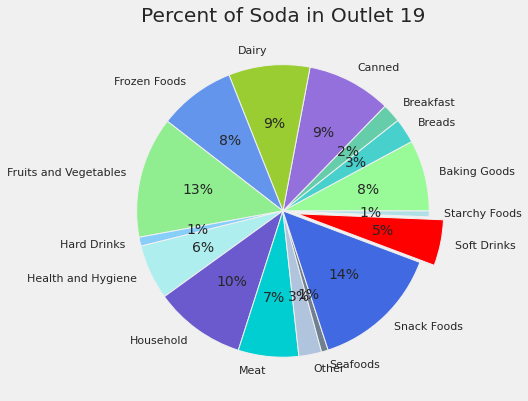

In [287]:
filter = df[df['Outlet_Identifier'] == 'OUT019']
soda = filter.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.pie(soda, autopct='%1.0f%%', # Got some of this from here https://www.pythoncharts.com/matplotlib/pie-chart-matplotlib/
        colors = ['palegreen', 'mediumturquoise', 'mediumaquamarine', 'mediumpurple', 'yellowgreen', 'cornflowerblue', 'lightgreen', 'lightskyblue', 'paleturquoise', 'slateblue', 'darkturquoise', 'lightsteelblue', 'slategrey', 'royalblue', 'red', 'powderblue'],
        labels = ['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy', 'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks', 'Health and Hygiene', 'Household', 'Meat', 'Other', 'Seafoods', 'Snack Foods', 'Soft Drinks', 'Starchy Foods'],
        explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0.1, 0))
plt.tight_layout()
plt.title('Percent of Soda in Outlet 19')
plt.rcParams['patch.linewidth'] = 1 # Got this line of code from here: https://stackoverflow.com/questions/20551477/changing-line-properties-in-matplotlib-pie-chart 

# When comparing the three pie charts (sorry, I do not know how to do them side by side) it becomes clear that the sugary drink tax would probably not disproportionately affect anyone, and that
# instead they all sell soft drinks relative to their size.  However, if we're looking at aggregate numbers, Outlet 27 would still be hit hardest and 19 least hard hit.